# Project Billionaires Statistics
<hr>
The aim of this project is to explore and analyze the dataset with the goal of getting more information about the following:

 - Wealth distribution analysis: Explore the distribution of billionaires' wealth across different industries, countries, etc. - Demographic analysis: Investigate the age, gender, etc.
 - Self-made vs. inherited wealth: Analyze the proportion of self-made billionaires and those who inherited their wealth.
 - Economic indicators: Study correlations between billionaire wealth and economic indicators such as GDP, CPI, and tax rates.
 - Geospatial analysis: Visualize the geographical distribution of billionaires and their wealth on a map.
 - Trends over time: Track changes in billionaire demographics and wealth over the years.

<hr>


### Let's explore the data

In [2]:
# Libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import squarify
import warnings
import re
import numpy as np

In [3]:
# Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset
df = pd.read_csv('C:/Users/Marcos/Desktop/Proyect Billionaires/Data/Billionaires Statistics Dataset.csv')

In [22]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [23]:
df.tail()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2639,2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,...,2.5,"$376,795,508,680",35.5,107.5,71.1,14.0,43.1,1.081166e+08,12.879721,121.774017


In [24]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [28]:
df.shape

(2640, 35)

In [29]:
print(df.dtypes)

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [30]:
# Let's see all the categories available
print(df['category'].unique())
# How many categories are there
print(df['category'].nunique())

['Fashion & Retail' 'Automotive' 'Technology' 'Finance & Investments'
 'Media & Entertainment' 'Telecom' 'Diversified' 'Food & Beverage'
 'Logistics' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Healthcare' 'Service'
 'Construction & Engineering' 'Sports']
18


In [8]:
df_depurated.isna().sum()
# We can see multiple NA values but for now we are not going to touch them

rank                                             0
finalWorth                                       0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                                         1887
residenceStateRegion           

<hr>

### Wealth distribution analysis

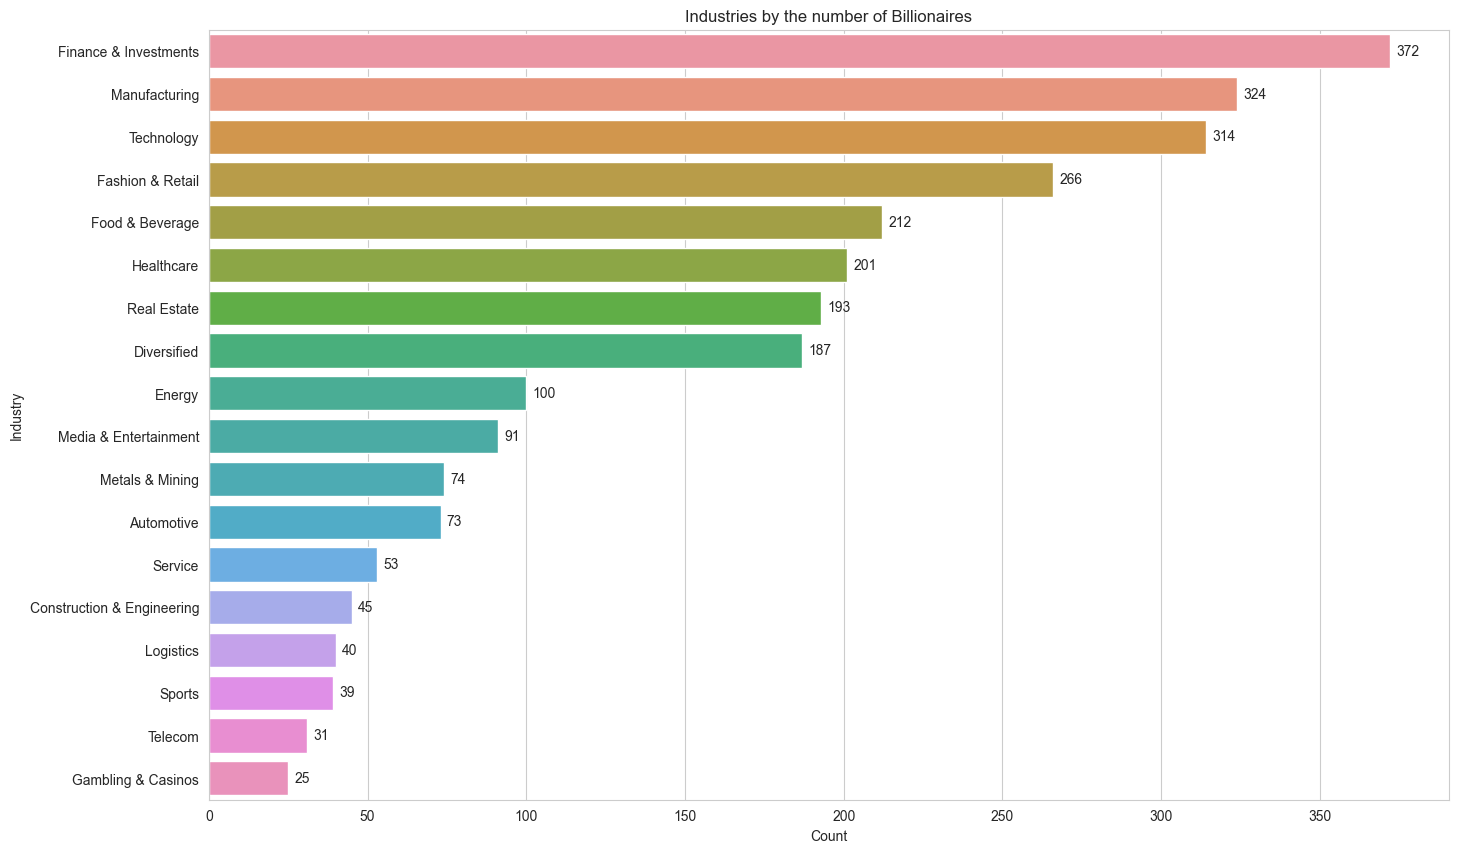

In [232]:
# Graph of the industries with the biggest number of billionaires

industries = df.groupby('industries')['personName'].count().sort_values(ascending=False)
# Group by Industries, then count the names per industry, then sort the values so that
# the industry with the most billionaires is in the top

plt.figure(figsize = (16,10))
sns.countplot(data = df, 
              y = 'industries', 
              order = industries.index,)  

for index, value in enumerate(industries.values.tolist()):    # This loop is to show the count of each bar and show in order the data
    plt.text(value + 2, 
             index, 
             str(value), 
             va='center',)

plt.title('Industries by the number of Billionaires')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

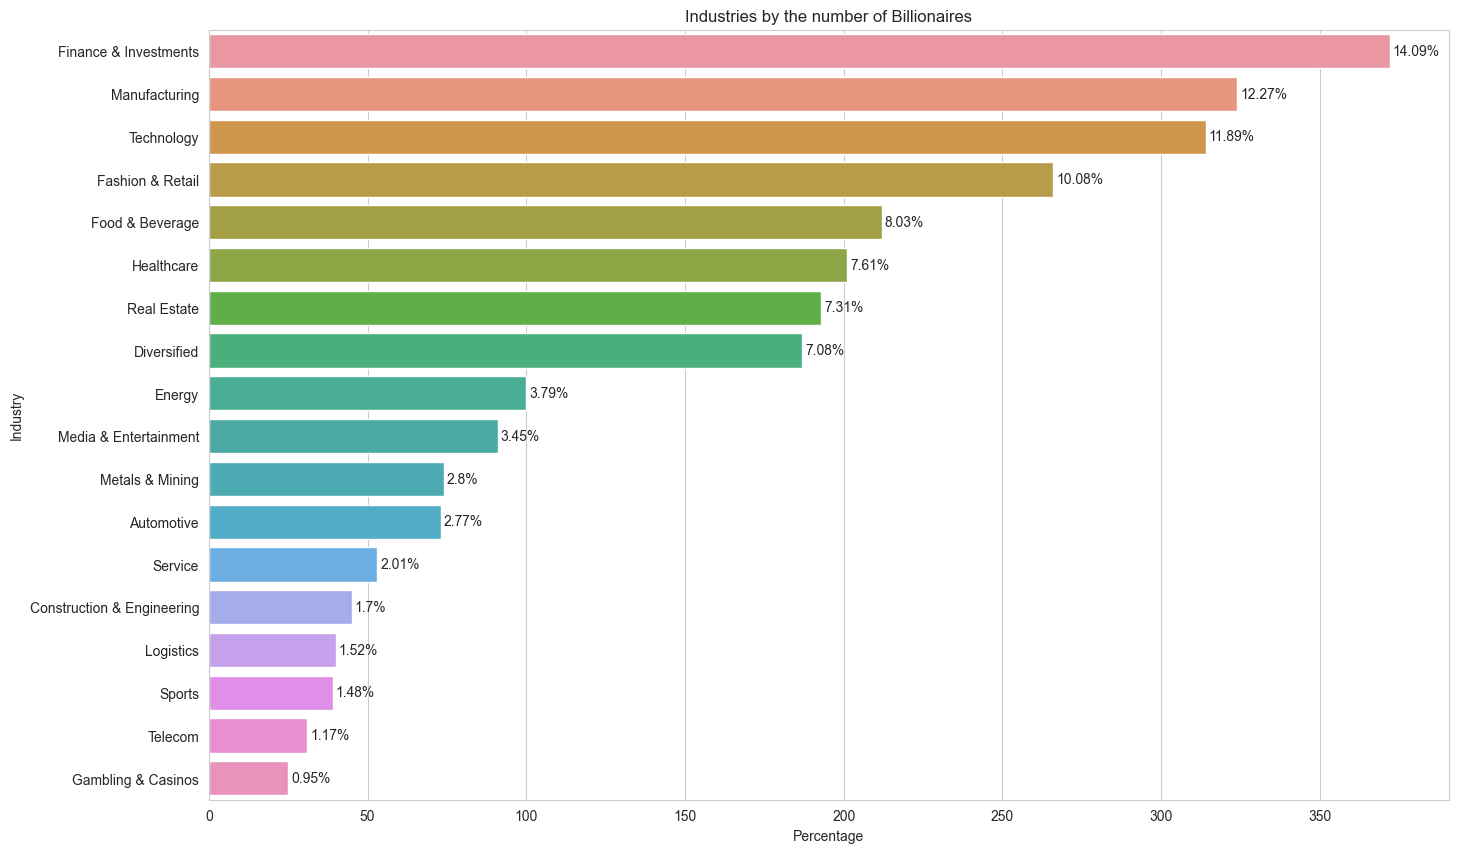

In [233]:
# What about percentage wise
plt.figure(figsize = (16,10))
sns.countplot(data = df, 
              y = 'industries', 
              order = industries.index,)

for index, value in enumerate(industries.values.tolist()):
    percentage = round(value / df['industries'].count()*100, 2)
    plt.text(value + 1, 
             index, 
             f'{percentage}%', 
             va='center',)

plt.title('Industries by the number of Billionaires')
plt.xlabel('Percentage')
plt.ylabel('Industry')
plt.show()

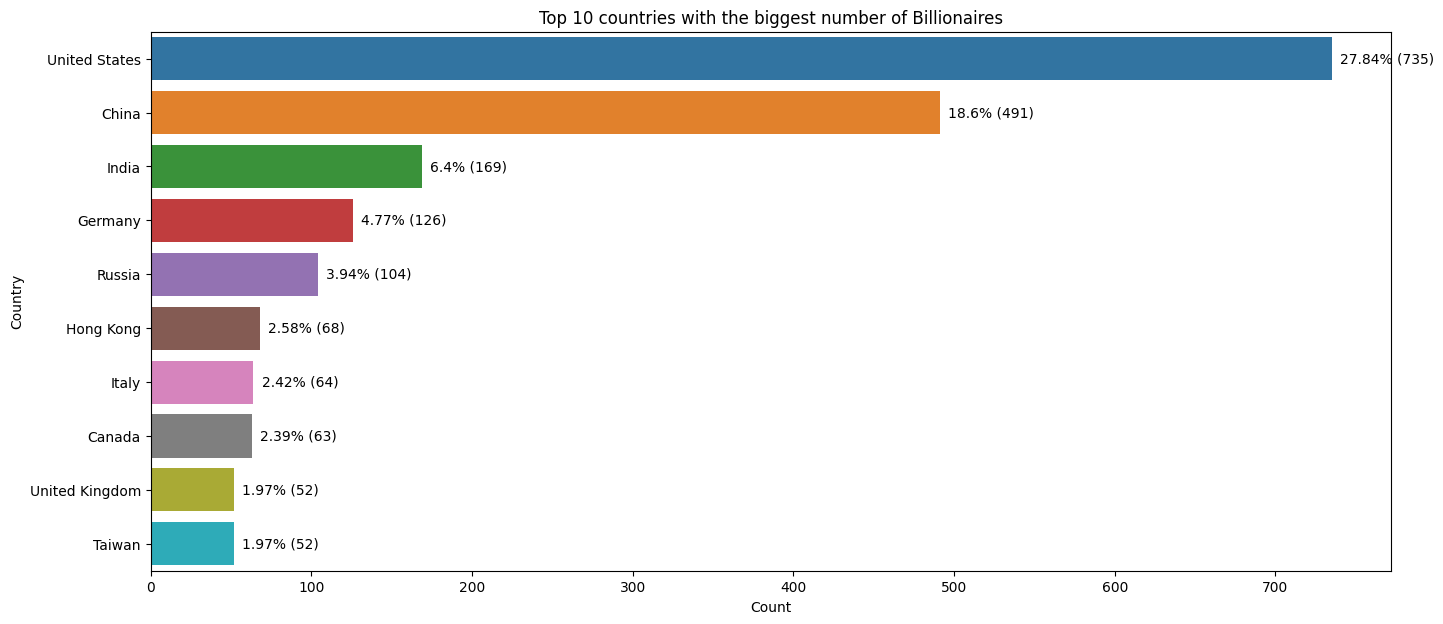

In [51]:
# Graph of the top 10 countries with the biggest number of billionaires

countryOfCitizenship = df.groupby('countryOfCitizenship')['personName'].count().sort_values(ascending=False).head(10)
plt.figure(figsize = (16,7))
sns.countplot(data = df, 
              y = 'countryOfCitizenship', 
              order = countryOfCitizenship.index)

for index, value in enumerate(countryOfCitizenship.values.tolist()):
    percentage = round(value / df['countryOfCitizenship'].count()*100, 2)
    plt.text(value + 5, 
             index, 
             f'{percentage}% ({value})',
            va = 'center')

plt.title('Top 10 countries with the biggest number of Billionaires')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

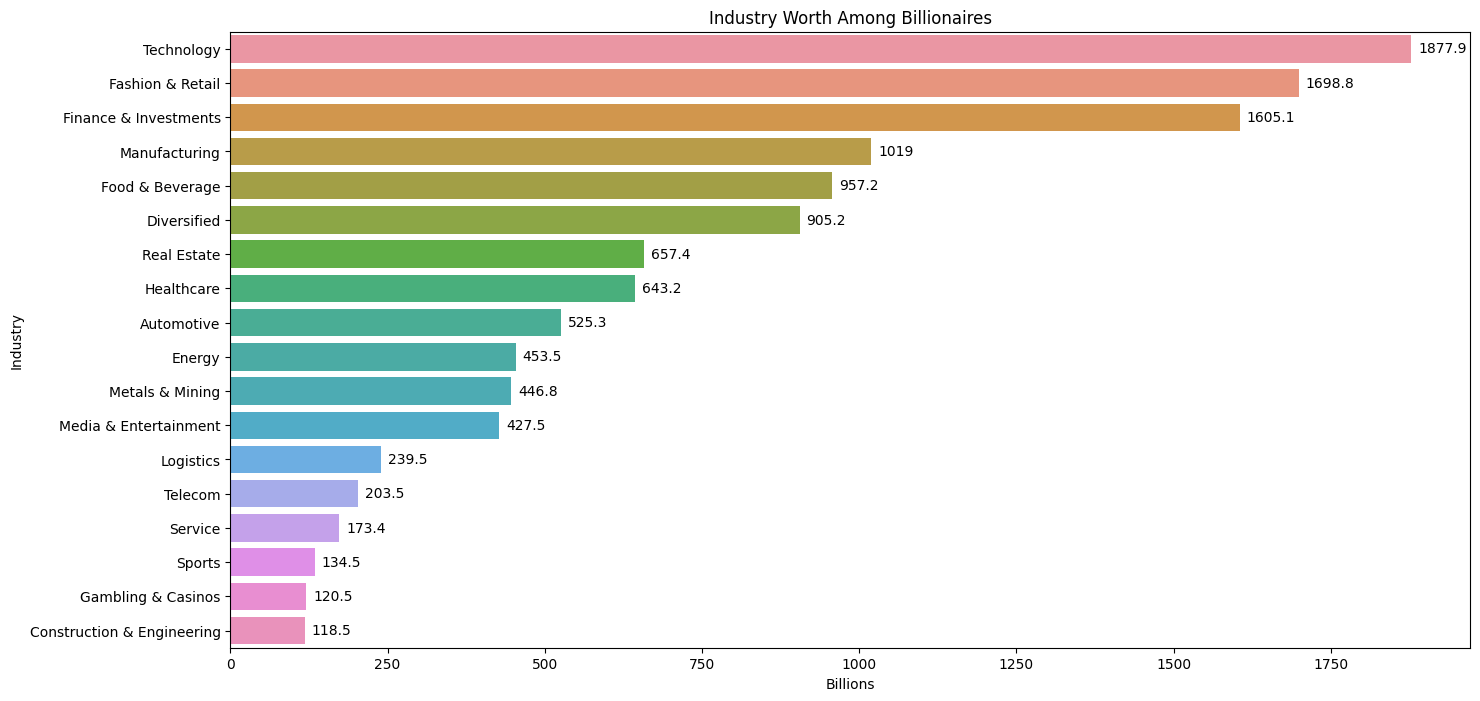

In [38]:
# df_industries_net = df[['industries','finalWorth']]
# df_industries_net_sorted = df_industries_net.groupby('industries').sum().sort_values(by=['finalWorth'], ascending=False).reset_index()
# plt.figure(figsize = (16,7))
# sns.countplot(data = df_industries_net,
#         y = 'industries')



df_industries_net = df[['industries','finalWorth']].groupby('industries').sum().div(1000, axis=0).sort_values(by=['finalWorth'], ascending=False).reset_index()
df_industries_net
plt.figure(figsize = (16,8))
chart = sns.barplot(data = df_industries_net,
           x = 'finalWorth',
           y = 'industries',
           );
chart.bar_label(chart.containers[0], fontsize=10, padding=5)
plt.title('Industry Worth Among Billionaires')
plt.xlabel('Billions')
plt.ylabel('Industry')
plt.show()

<hr>

### Demographic analysis

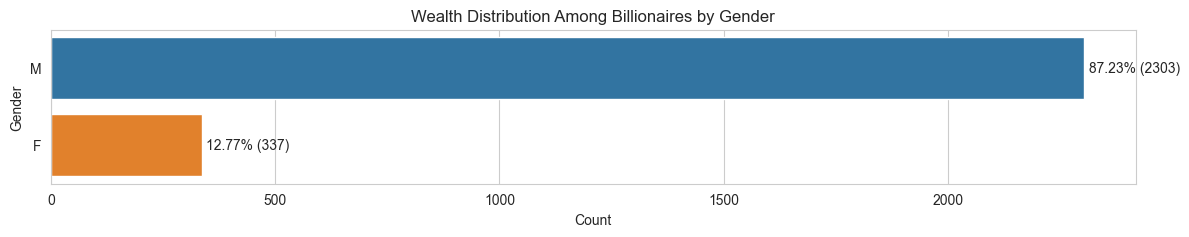

In [238]:
# Wealth Distribution Among Billionaires by Gender

gender = df.groupby('gender')['personName'].count().sort_values(ascending=False)

plt.figure(figsize = (14,2))
sns.countplot(data = df, 
              y = 'gender', 
              order = gender.index)

for index, value in enumerate(gender.values.tolist()):
    percentage = round(value / df['gender'].count()*100, 2)
    plt.text(value + 10, 
             index, 
             f'{percentage}% ({value})',
            va = 'center')

plt.title('Wealth Distribution Among Billionaires by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

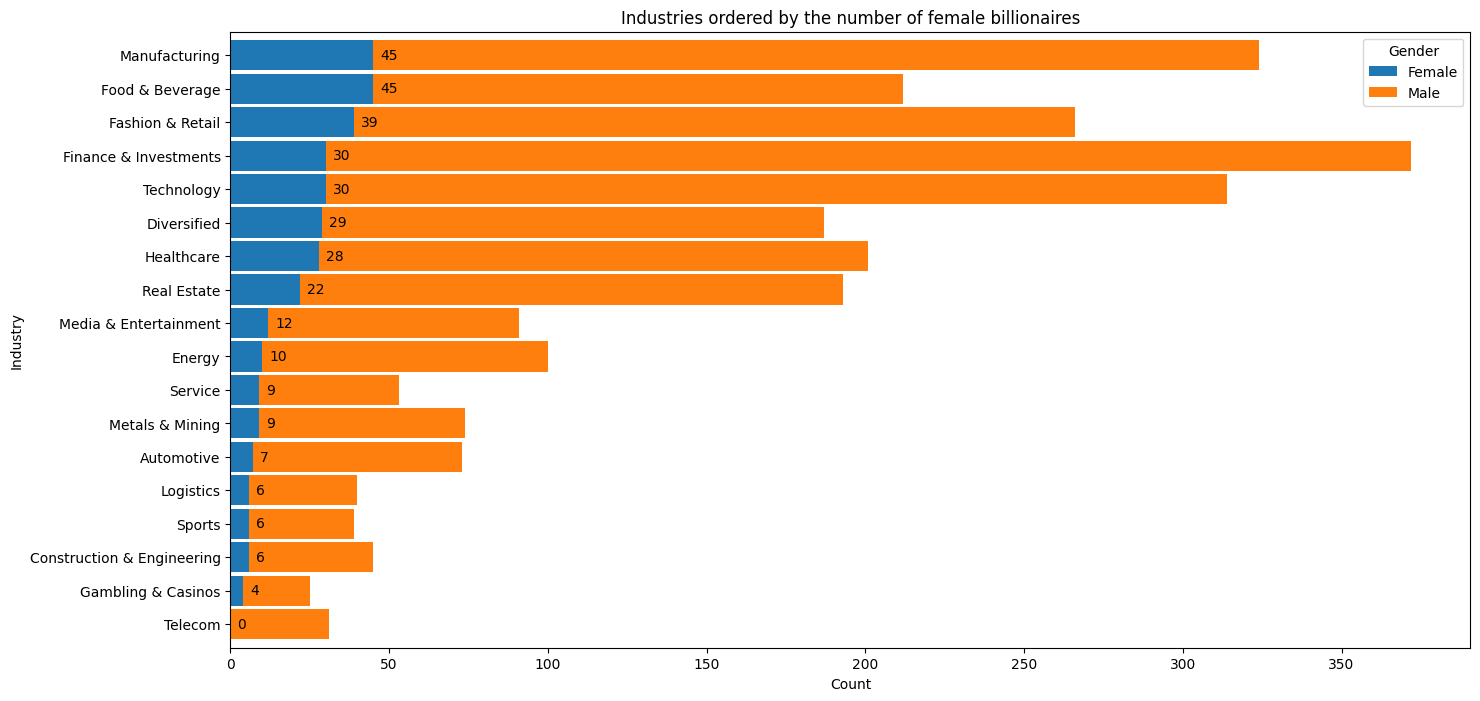

In [152]:
# First let's create a dataframe with only industries and gender
gender_df = df[['industries', 'gender']]

# Then, let's group
gender_counts = gender_df.groupby(['industries', 'gender']).size().unstack(fill_value=0)
# Suppose you have the following data in gender_df:
#    industries gender
# 0     Industry1      M
# 1     Industry1      F
# 2     Industry2      M
# 3     Industry2      F
# 4     Industry2      M

# When you apply gender_df.groupby(['industries', 'gender']).size(), you're grouping the data by
# 'industries' and 'gender', and then counting the occurrences in each group. The result will be
# a Series that looks like this:
#    industries  gender
# Industry1   M         1
#             F         1
# Industry2   M         2
#             F         1

# When you apply the .unstack() method to this multi-level indexed Series, it pivots the data, 
# reshaping it into a DataFrame
# industries  gender
# Industry1   M         1
#             F         1
# Industry2   M         2
#             F         1

total_counts = gender_counts.sum(axis=1) # Number of billionaires within each industry

# Sort the industries based on the number of female billionaires
sorted_gender_counts = gender_counts['F'].sort_values(ascending=True)
gender_counts = gender_counts.loc[sorted_gender_counts.index]

# Create the horizontal stacked bar chart
chart = gender_counts.plot(kind='barh', 
                           stacked=True, 
                           figsize=(16, 8), 
                           width=0.9)
chart.bar_label(chart.containers[0], fontsize=10, padding=5)

plt.title('Industries ordered by the number of female billionaires')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.legend(['Female', 'Male'], title='Gender')
plt.show()


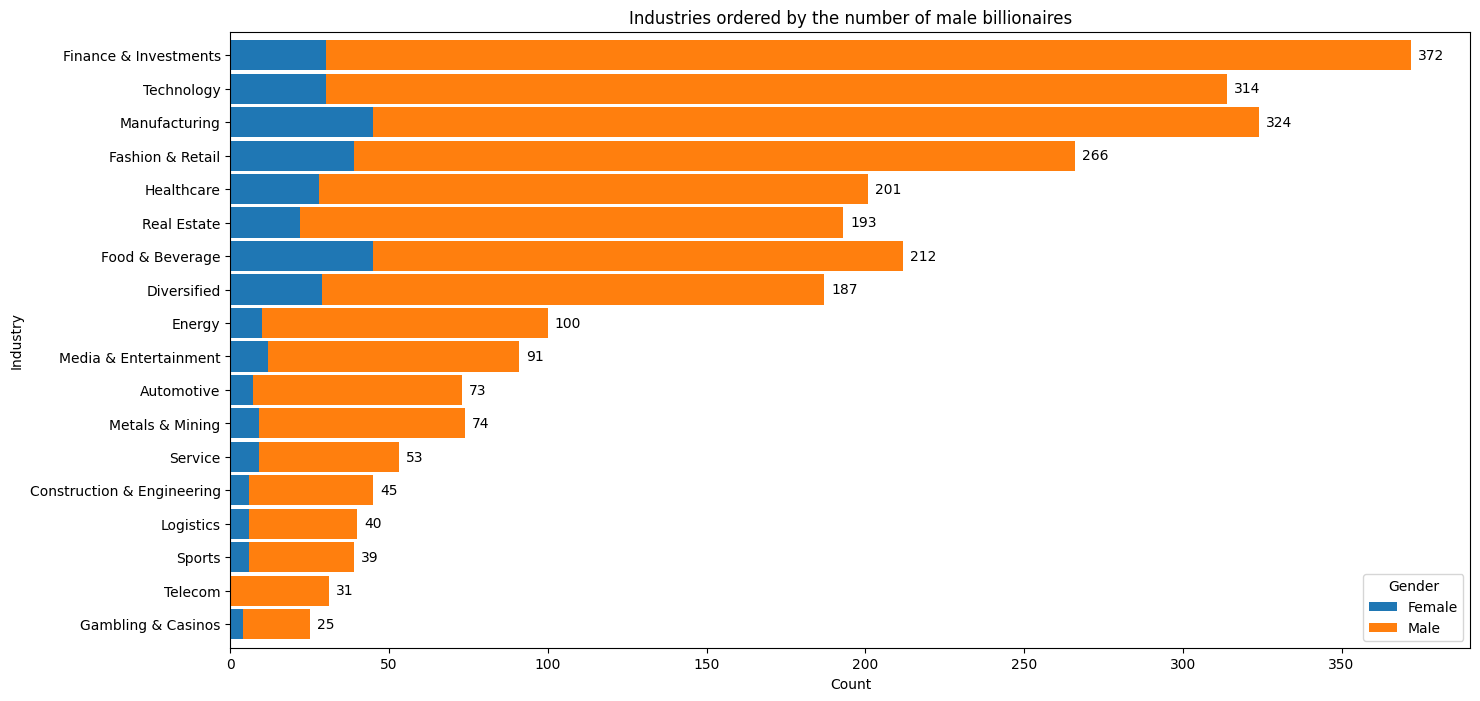

In [158]:
gender_df = df[['industries', 'gender']]

gender_counts = gender_df.groupby(['industries', 'gender']).size().unstack(fill_value=0)
total_counts = gender_counts.sum(axis=1)

sorted_gender_counts = gender_counts['M'].sort_values(ascending=True)
gender_counts = gender_counts.loc[sorted_gender_counts.index]

# Create the horizontal stacked bar chart
chart = gender_counts.plot(kind='barh', 
                           stacked=True, 
                           figsize=(16, 8), 
                           width=0.9)
chart.bar_label(chart.containers[1], fontsize=10, padding=5)

plt.title('Industries ordered by the number of male billionaires')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.legend(['Female', 'Male'], title='Gender')
plt.show()

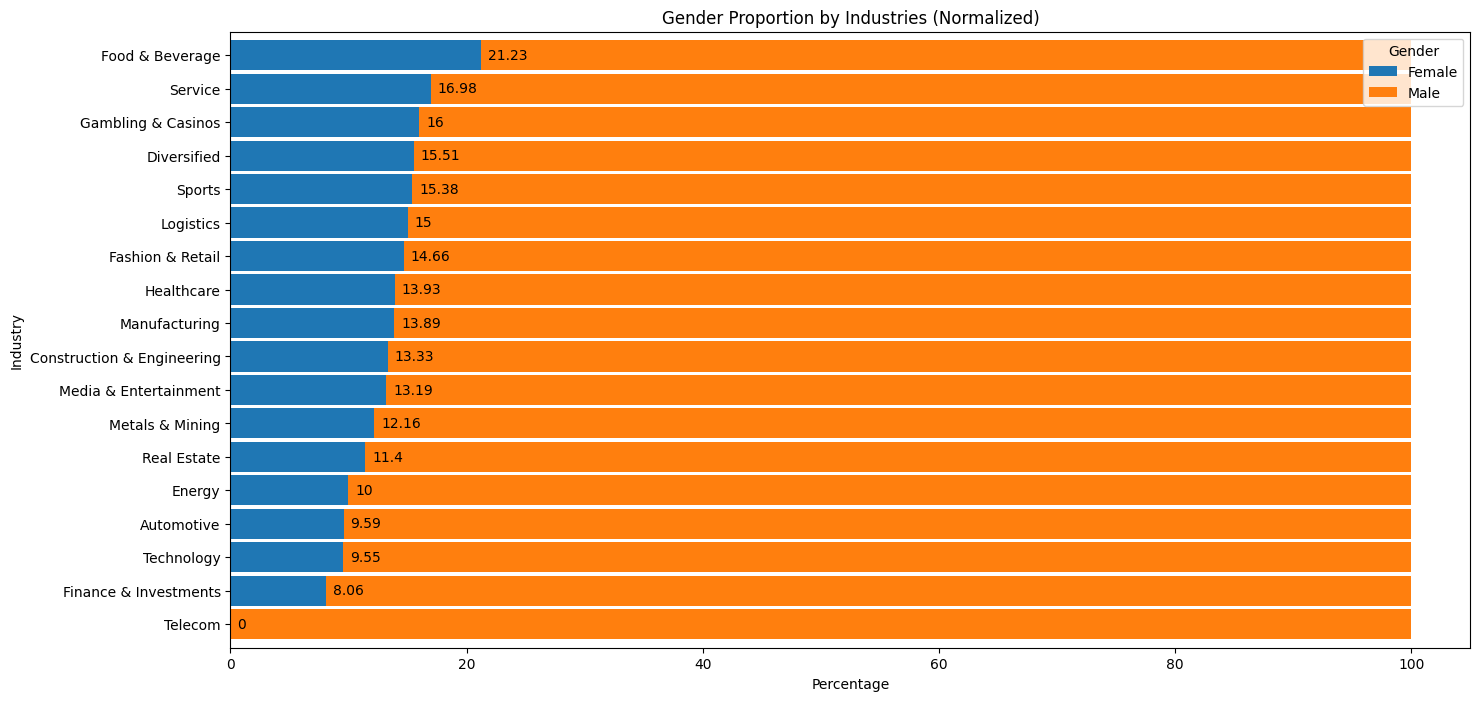

In [157]:
# What about percentage wise
gender_df = df[['industries', 'gender']]
gender_counts = gender_df.groupby(['industries', 'gender']).size().unstack(fill_value = 0)

total_counts = gender_counts.sum(axis = 1)

normalized_gender_counts = gender_counts.div(total_counts, axis=0) * 100 # Percentage Data
sorted_gender_counts = normalized_gender_counts['F'].sort_values(ascending=True)
normalized_gender_counts = normalized_gender_counts.loc[sorted_gender_counts.index].round(2)

chart = normalized_gender_counts.plot(kind='barh', 
                                      stacked=True, 
                                      figsize=(16, 8), 
                                      width=0.9) # , color=['red', 'blue']
chart.bar_label(chart.containers[0], 
                fontsize=10, 
                padding=5)

# for index, (industry, female_percentage) in enumerate(zip(normalized_gender_counts.index, normalized_gender_counts['F'])):
#     x_position = female_percentage + 1
#     chart.text(x_position, 
#                index, 
#                f'{female_percentage:.1f}%', 
#                va='center')

plt.title('Gender Proportion by Industries (Normalized)')
plt.xlabel('Percentage')
plt.ylabel('Industry')
plt.legend(['Female', 'Male'], title='Gender')
plt.show()

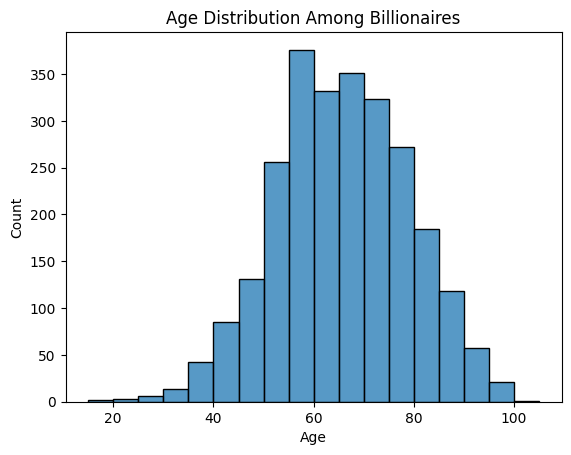

In [30]:
# Let's analyze their age
# Graph of the top 10 countries with the biggest number of billionaires
df_age = df['age']
sns.histplot(data=df_age, bins = range(15, 110, 5),);
plt.title('Age Distribution Among Billionaires')
plt.xlabel('Age')
plt.show()

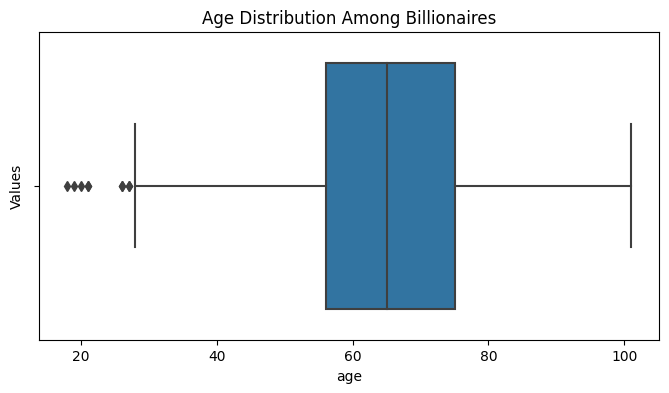

In [45]:
plt.figure(figsize = (8,4))
sns.boxplot(x=df_age)
plt.title('Age Distribution Among Billionaires')
plt.ylabel('Values')
plt.show()

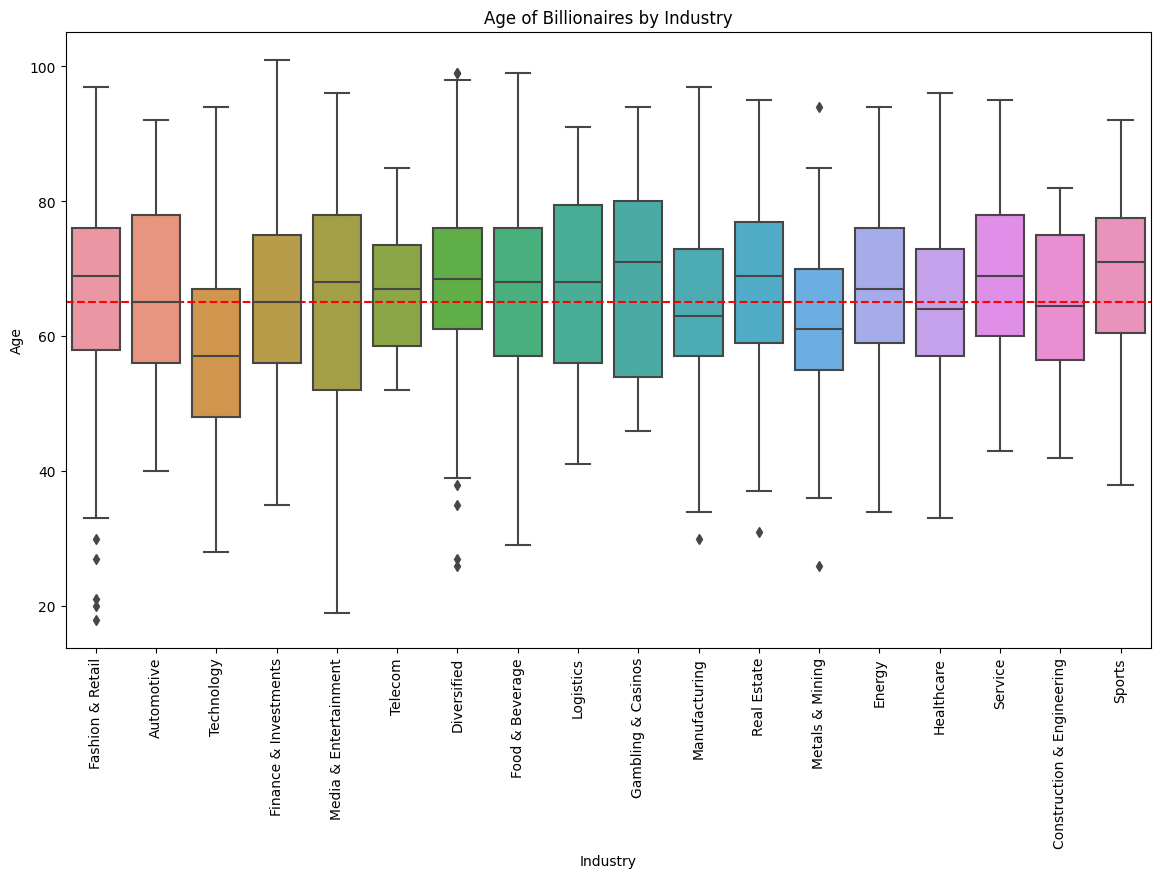

In [138]:
# Let's analyze their age
# Graph of the top 10 countries with the biggest number of billionaires
df_age = df[['age','industries']]
# df_age_mean = df_age.groupby(['industries']).mean().round(2).sort_values(by=['age'],ascending=True).reset_index()

plt.figure(figsize = (14,8))
sns.boxplot(data=df_age, y="age", x="industries")

plt.title('Age of Billionaires by Industry')
plt.xlabel('Industry')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.axhline(y=df_age['age'].median(), color='red', linestyle='--')
plt.show()

<hr>

### Self-made vs. inherited wealth